In [516]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns



DATASET HAS BEEN TAKEN FROM KAGGLE

DATA:

Timestamp

Age

Gender

Country

state: If you live in the United States, which state or territory do you live in?

self_employed: Are you self-employed?

family_history: Do you have a family history of mental illness?

treatment: Have you sought treatment for a mental health condition?

work_interfere: If you have a mental health condition, do you feel that it interferes with your work?

no_employees: How many employees does your company or organization have?

remote_work: Do you work remotely (outside of an office) at least 50% of the time?

tech_company: Is your employer primarily a tech company/organization?

benefits: Does your employer provide mental health benefits?

care_options: Do you know the options for mental health care your employer provides?

wellness_program: Has your employer ever discussed mental health as part of an employee wellness program?

seek_help: Does your employer provide resources to learn more about mental health issues and how to seek help?

anonymity: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?

leave: How easy is it for you to take medical leave for a mental health condition?

mentalhealthconsequence: Do you think that discussing a mental health issue with your employer would have negative consequences?

physhealthconsequence: Do you think that discussing a physical health issue with your employer would have negative consequences?

coworkers: Would you be willing to discuss a mental health issue with your coworkers?

supervisor: Would you be willing to discuss a mental health issue with your direct supervisor(s)?

mentalhealthinterview: Would you bring up a mental health issue with a potential employer in an interview?

physhealthinterview: Would you bring up a physical health issue with a potential employer in an interview?

mentalvsphysical: Do you feel that your employer takes mental health as seriously as physical health?

obs_consequence: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?

comments: Any additional notes or comments

# GOAL

EDA of Working Environment in Tech Companies and building a model for the employees, predicting whether or not they should consider seeking treatment/therapy if they are suffering from mental illness.

In [517]:
df=pd.read_csv('mental health in tech survey.csv')

In [518]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [519]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [520]:
df=df.drop(['Timestamp','comments'],axis=1)

In [521]:
df=df.loc[df.Country=='United States']

In [522]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 751 entries, 0 to 1258
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        751 non-null    int64 
 1   Gender                     751 non-null    object
 2   Country                    751 non-null    object
 3   state                      740 non-null    object
 4   self_employed              740 non-null    object
 5   family_history             751 non-null    object
 6   treatment                  751 non-null    object
 7   work_interfere             607 non-null    object
 8   no_employees               751 non-null    object
 9   remote_work                751 non-null    object
 10  tech_company               751 non-null    object
 11  benefits                   751 non-null    object
 12  care_options               751 non-null    object
 13  wellness_program           751 non-null    object
 14  seek_help

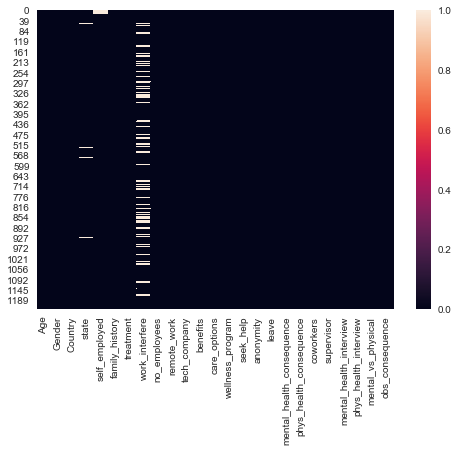

In [523]:
sns.heatmap(df.isnull())

In [524]:
df.work_interfere.unique()

array(['Often', 'Rarely', 'Never', 'Sometimes', nan], dtype=object)

In [525]:
#df=df.dropna()

In [526]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 751 entries, 0 to 1258
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        751 non-null    int64 
 1   Gender                     751 non-null    object
 2   Country                    751 non-null    object
 3   state                      740 non-null    object
 4   self_employed              740 non-null    object
 5   family_history             751 non-null    object
 6   treatment                  751 non-null    object
 7   work_interfere             607 non-null    object
 8   no_employees               751 non-null    object
 9   remote_work                751 non-null    object
 10  tech_company               751 non-null    object
 11  benefits                   751 non-null    object
 12  care_options               751 non-null    object
 13  wellness_program           751 non-null    object
 14  seek_help

In [527]:
df.Age.describe()

count    751.000000
mean      33.328895
std       13.534635
min      -29.000000
25%       27.500000
50%       32.000000
75%       37.500000
max      329.000000
Name: Age, dtype: float64

In [528]:
df=df.loc[(df.Age>18) & (df.Age<100),:]

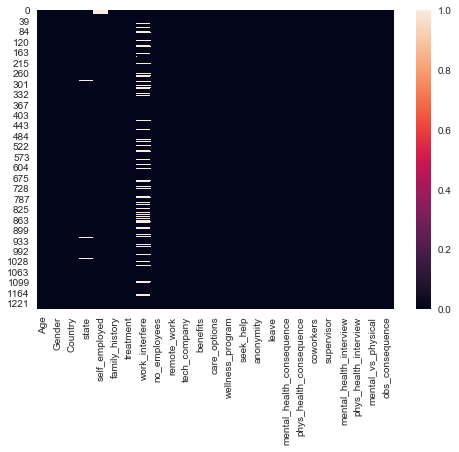

In [529]:
sns.heatmap(df.isnull())

In [530]:
df.Gender.unique()

array(['Female', 'M', 'Male', 'female', 'male', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'Cis Male', 'm', 'f',
       'Male (CIS)', 'queer/she/they', 'non-binary', 'Femake', 'woman',
       'Make', 'Nah', 'Genderqueer', 'Female ', 'Woman',
       'cis-female/femme', 'Male ', 'Trans woman', 'Man', 'msle',
       'Female (trans)', 'Female (cis)', 'Mail', 'cis male', 'femail'],
      dtype=object)

In [531]:
df['Gender']=df.Gender.replace(['Man','maile','male', 'Male', 'M', 'Male-ish','m','Male ','msle','Mail','Make'],'Male')
df['Gender']=df.Gender.replace(['Femake','Female', 'female','F','f','queer/she/they','woman','Female ','Woman','femail'],'Female')
df['Gender']=df.Gender.replace(['Trans-female', 'Cis Female', 'Cis Male','non-binary', 'Nah', 'Genderqueer', 'cis-female/femme','Trans woman', 'Female (trans)', 'Female (cis)', 'cis male', 'p','Male (CIS)'],'Others')

In [532]:
df.Gender.unique()

array(['Female', 'Male', 'Others'], dtype=object)

In [533]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 743 entries, 0 to 1258
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        743 non-null    int64 
 1   Gender                     743 non-null    object
 2   Country                    743 non-null    object
 3   state                      732 non-null    object
 4   self_employed              732 non-null    object
 5   family_history             743 non-null    object
 6   treatment                  743 non-null    object
 7   work_interfere             601 non-null    object
 8   no_employees               743 non-null    object
 9   remote_work                743 non-null    object
 10  tech_company               743 non-null    object
 11  benefits                   743 non-null    object
 12  care_options               743 non-null    object
 13  wellness_program           743 non-null    object
 14  seek_help

# EDA 

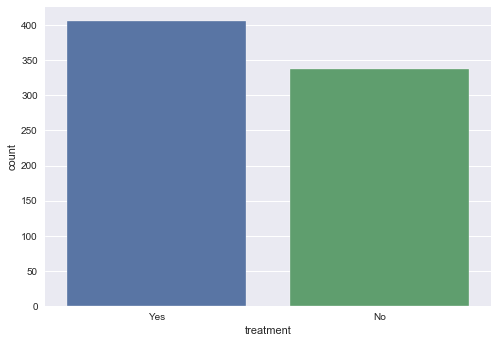

In [534]:
sns.countplot(df.treatment)

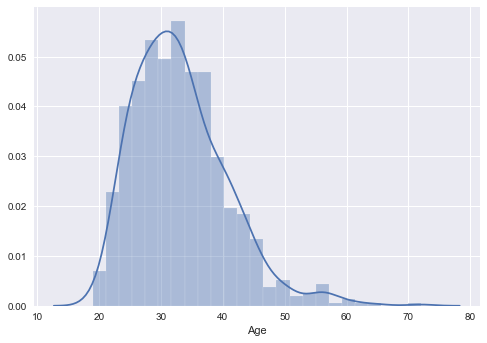

In [535]:
sns.distplot(df.Age)

Max range between 28 to 35

In [536]:
df['age_group']=pd.cut(df.Age,bins = [18,29,55,80],labels=['Young','Middle','Old'])


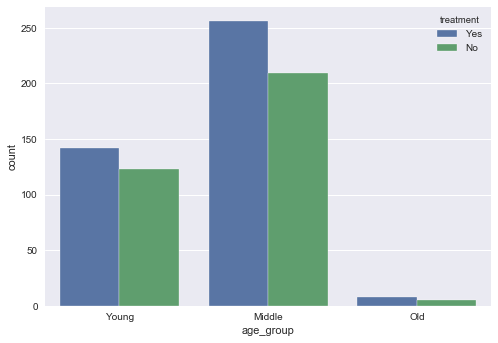

In [537]:
sns.countplot(df.age_group,hue=df.treatment)

Mostly affected age group 29-55

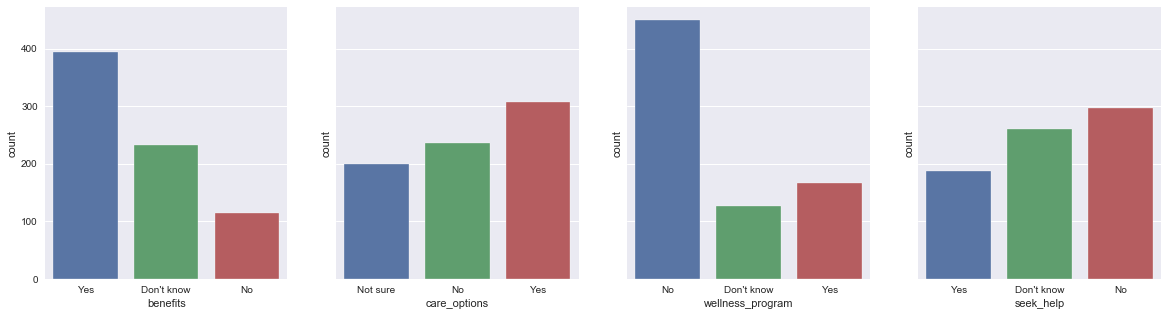

In [538]:
fig,(ax1,ax2,ax3,ax4)=plt.subplots(1,4,sharey=True,figsize=(20,5))
sns.countplot('benefits',ax=ax1,data=df)
sns.countplot('care_options',data=df,ax=ax2)
sns.countplot('wellness_program',data=df,ax=ax3)
sns.countplot('seek_help',data=df,ax=ax4)


Most of the employers do provide mental health benefits, most of the employees are aware of the mental health care options as well but do not seek help.
As a part of wellness program, majority of the employers DO NOT discuss or provide resources to learn about mental health issues or how to seek help.


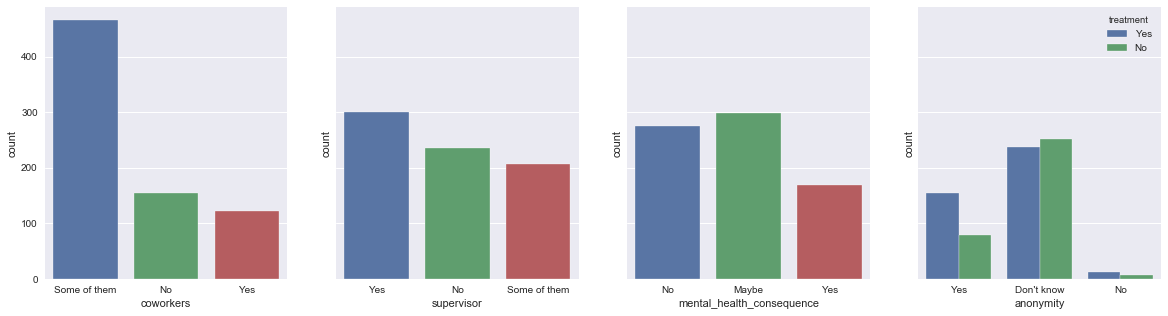

In [543]:
fig,(ax1,ax2,ax3,ax4)=plt.subplots(1,4,sharey=True,figsize=(20,5))
sns.countplot('coworkers',ax=ax1,data=df)
sns.countplot('supervisor',data=df,ax=ax2)
sns.countplot('mental_health_consequence',data=df,ax=ax3)
sns.countplot(df.anonymity,hue=df.treatment,ax=ax4)

Employers are more comfortable in discussing this issue with thier supervisor whereas some with coworkers as well. 

But it is clearly evident that the proportion of employees seeking treatment is different from those who know that thier anonymity is protected.



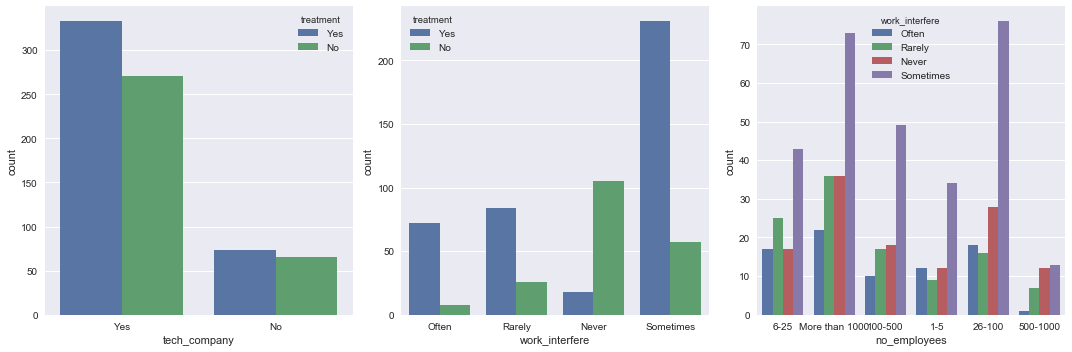

In [411]:
f, (ax1,ax2,ax3) = plt.subplots(1, 3,figsize=(15,5),sharey=False)
sns.countplot(x='work_interfere',data=df,hue='treatment',ax=ax2)
sns.countplot(df.tech_company,hue=df.treatment,ax=ax1)
sns.countplot(df.no_employees,hue=df.work_interfere,ax=ax3)
plt.tight_layout()

More than 75% of the employees sought some kind of treatment whether or not they are working in tech. Majority of the employees claim that mental illness interferes with thier work and they have to seek some kind of treatment even if it is a rare event. 
Also in comparing to other companies, organization(Startups) the work load is greater which can lead to mental illness

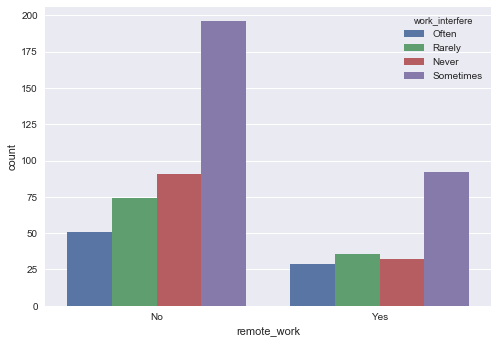

In [412]:
sns.countplot(df.remote_work,hue=df.work_interfere)

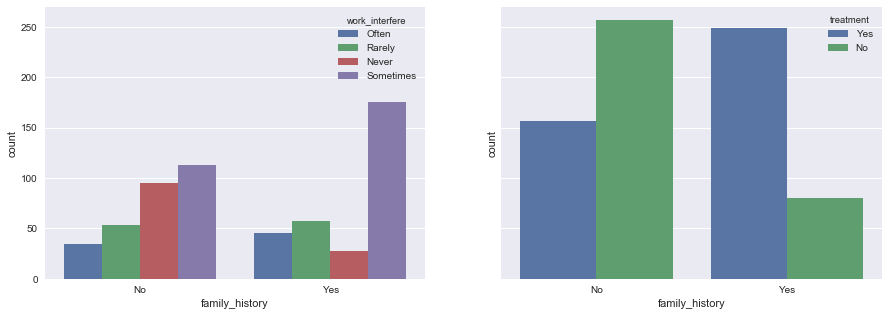

In [413]:
f, (ax1,ax2) = plt.subplots(1, 2,figsize=(15,5),sharey=True)
sns.countplot('family_history',data=df,hue='treatment',ax=ax2)
sns.countplot(df.family_history,hue=df.work_interfere,ax=ax1)


Here, It can be clearly seen that employees having a family history of mental illness have more difficulty in concentrating in thier work and have sought treatment, it is a significant feature contributing to mental illness. 

In [415]:
df.drop('Country',axis=1,inplace=True)

Text(0.5, 0, 'States')

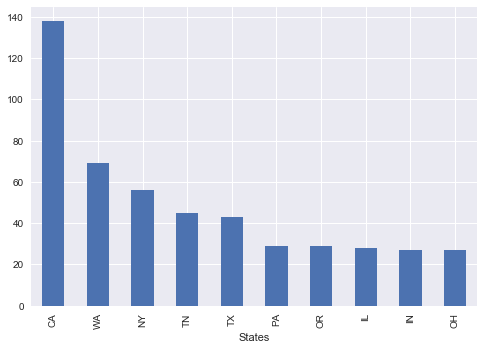

In [416]:
df.state.value_counts().nlargest(10).plot(kind='bar')
plt.xlabel('States')


In [417]:
df.drop('Age',axis=1,inplace=True)

In [418]:
df=df.reset_index(drop=True)

In [419]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Gender                     743 non-null    object  
 1   state                      732 non-null    object  
 2   self_employed              732 non-null    object  
 3   family_history             743 non-null    object  
 4   treatment                  743 non-null    object  
 5   work_interfere             601 non-null    object  
 6   no_employees               743 non-null    object  
 7   remote_work                743 non-null    object  
 8   tech_company               743 non-null    object  
 9   benefits                   743 non-null    object  
 10  care_options               743 non-null    object  
 11  wellness_program           743 non-null    object  
 12  seek_help                  743 non-null    object  
 13  anonymity                  743 non-

In [420]:
top_10 = [x for x in df.state.value_counts().sort_values(ascending=False).head(10).index]
top_10

['CA', 'WA', 'NY', 'TN', 'TX', 'PA', 'OR', 'IL', 'OH', 'IN']

In [421]:
for label in top_10:
    df[label] = np.where(df['state']==label, 1, 0)

df[['state']+top_10].head(10)

,state,CA,WA,NY,TN,TX,PA,OR,IL,OH,IN
0,IL,0,0,0,0,0,0,0,1,0,0
1,IN,0,0,0,0,0,0,0,0,0,1
2,TX,0,0,0,0,1,0,0,0,0,0
3,TN,0,0,0,1,0,0,0,0,0,0
4,MI,0,0,0,0,0,0,0,0,0,0
5,IL,0,0,0,0,0,0,0,1,0,0
6,OH,0,0,0,0,0,0,0,0,1,0
7,CA,1,0,0,0,0,0,0,0,0,0
8,CT,0,0,0,0,0,0,0,0,0,0
9,IL,0,0,0,0,0,0,0,1,0,0


In [422]:
df.drop(['state'],axis=1,inplace=True)

In [423]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Gender                     743 non-null    object  
 1   self_employed              732 non-null    object  
 2   family_history             743 non-null    object  
 3   treatment                  743 non-null    object  
 4   work_interfere             601 non-null    object  
 5   no_employees               743 non-null    object  
 6   remote_work                743 non-null    object  
 7   tech_company               743 non-null    object  
 8   benefits                   743 non-null    object  
 9   care_options               743 non-null    object  
 10  wellness_program           743 non-null    object  
 11  seek_help                  743 non-null    object  
 12  anonymity                  743 non-null    object  
 13  leave                      743 non-

In [424]:
df[(df.work_interfere.isnull()) & (df.treatment=='Yes')]

,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,...,CA,WA,NY,TN,TX,PA,OR,IL,OH,IN
322,Female,No,No,Yes,NaN,26-100,No,Yes,Yes,Yes,...,0,0,0,0,0,0,0,0,0,0


In [425]:
df[(df.work_interfere.isnull()) & (df.treatment=='No')]

,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,...,CA,WA,NY,TN,TX,PA,OR,IL,OH,IN
18,Male,No,No,No,NaN,1-5,No,Yes,Don't know,Not sure,...,0,0,0,1,0,0,0,0,0,0
25,Male,No,No,No,NaN,100-500,No,Yes,Yes,Yes,...,0,0,0,0,0,0,0,0,0,1
27,Male,No,No,No,NaN,More than 1000,Yes,Yes,Yes,Not sure,...,0,0,0,0,0,0,0,0,0,0
30,Male,No,No,No,NaN,6-25,No,Yes,No,No,...,0,0,0,1,0,0,0,0,0,0
33,Male,No,No,No,NaN,100-500,Yes,Yes,Don't know,Not sure,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,Male,No,No,No,NaN,More than 1000,No,No,Yes,No,...,0,0,0,0,0,0,0,0,0,0
706,Male,No,No,No,NaN,More than 1000,No,Yes,Don't know,Not sure,...,0,0,0,0,0,0,0,1,0,0
707,Male,No,No,No,NaN,More than 1000,No,No,Yes,No,...,0,0,0,0,0,0,0,1,0,0
709,Male,No,Yes,No,NaN,6-25,No,Yes,Don't know,No,...,0,0,1,0,0,0,0,0,0,0


In [426]:
df[(df.work_interfere.isnull()) & (df.family_history=='Yes')]

,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,...,CA,WA,NY,TN,TX,PA,OR,IL,OH,IN
37,Male,No,Yes,No,NaN,6-25,Yes,Yes,Don't know,No,...,0,0,0,1,0,0,0,0,0,0
65,Male,No,Yes,No,NaN,26-100,No,Yes,Don't know,No,...,0,0,1,0,0,0,0,0,0,0
91,Female,No,Yes,No,NaN,More than 1000,Yes,Yes,Don't know,Not sure,...,0,0,0,0,0,1,0,0,0,0
121,Male,No,Yes,No,NaN,6-25,Yes,Yes,Yes,Yes,...,0,0,0,1,0,0,0,0,0,0
152,Male,No,Yes,No,NaN,100-500,No,Yes,Yes,No,...,0,0,0,0,0,0,0,0,0,0
193,Male,No,Yes,No,NaN,More than 1000,No,Yes,Don't know,No,...,1,0,0,0,0,0,0,0,0,0
233,Male,No,Yes,No,NaN,More than 1000,No,Yes,Yes,No,...,1,0,0,0,0,0,0,0,0,0
254,Female,No,Yes,No,NaN,500-1000,No,No,No,No,...,0,0,0,0,1,0,0,0,0,0
261,Male,No,Yes,No,NaN,6-25,No,Yes,Yes,Yes,...,1,0,0,0,0,0,0,0,0,0
288,Male,No,Yes,No,NaN,More than 1000,No,Yes,Yes,Not sure,...,0,0,0,0,0,0,0,0,0,0


In [427]:
df[(df.work_interfere.isnull()) & (df.family_history=='No')]

,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,...,CA,WA,NY,TN,TX,PA,OR,IL,OH,IN
18,Male,No,No,No,NaN,1-5,No,Yes,Don't know,Not sure,...,0,0,0,1,0,0,0,0,0,0
25,Male,No,No,No,NaN,100-500,No,Yes,Yes,Yes,...,0,0,0,0,0,0,0,0,0,1
27,Male,No,No,No,NaN,More than 1000,Yes,Yes,Yes,Not sure,...,0,0,0,0,0,0,0,0,0,0
30,Male,No,No,No,NaN,6-25,No,Yes,No,No,...,0,0,0,1,0,0,0,0,0,0
33,Male,No,No,No,NaN,100-500,Yes,Yes,Don't know,Not sure,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
689,Male,No,No,No,NaN,6-25,No,Yes,Don't know,Not sure,...,0,0,1,0,0,0,0,0,0,0
691,Male,No,No,No,NaN,More than 1000,No,No,Yes,No,...,0,0,0,0,0,0,0,0,0,0
706,Male,No,No,No,NaN,More than 1000,No,Yes,Don't know,Not sure,...,0,0,0,0,0,0,0,1,0,0
707,Male,No,No,No,NaN,More than 1000,No,No,Yes,No,...,0,0,0,0,0,0,0,1,0,0


In [428]:
def impute(cols):
    work_interfere = cols[0]
    family_history = cols[1]
    
    if pd.isnull(work_interfere):

        if family_history == 'Yes':
            return 'Sometimes'

        elif family_history=='No':
            return 'Never'

    else:
        return work_interfere

In [429]:
df.work_interfere = df[['work_interfere','family_history']].apply(impute,axis=1)

In [513]:
df.work_interfere.unique()

array(['Sometimes', 'Never', 'Often', 'Rarely'], dtype=object)

In [435]:
df=df.dropna()

In [436]:
df_dummies=pd.get_dummies(df,drop_first=True)

In [438]:
df.head()

,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,...,CA,WA,NY,TN,TX,PA,OR,IL,OH,IN
11,Male,Yes,Yes,No,Sometimes,1-5,Yes,Yes,Yes,Not sure,...,0,0,0,0,0,0,0,0,0,0
12,Male,No,Yes,Yes,Sometimes,100-500,No,Yes,Yes,Yes,...,0,0,1,0,0,0,0,0,0,0
13,Male,Yes,No,No,Never,1-5,Yes,Yes,No,No,...,0,0,0,0,0,0,0,0,0,0
14,Male,No,No,Yes,Often,26-100,Yes,Yes,Yes,Yes,...,0,0,0,0,0,0,0,0,0,0
15,Male,No,No,Yes,Never,More than 1000,No,No,Don't know,No,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [442]:
X=df_dummies.drop(['treatment_Yes'],axis=1)
y=df_dummies['treatment_Yes']

In [443]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [446]:
X

,CA,WA,NY,TN,TX,PA,OR,IL,OH,IN,...,supervisor_Yes,mental_health_interview_No,mental_health_interview_Yes,phys_health_interview_No,phys_health_interview_Yes,mental_vs_physical_No,mental_vs_physical_Yes,obs_consequence_Yes,age_group_Middle,age_group_Old
11,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,1,0,1,1,1,0
12,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,0,0,0
13,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
14,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,1,0
15,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
738,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
739,0,0,0,0,0,0,0,1,0,0,...,1,1,0,1,0,0,1,0,1,0
740,1,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,0,1,0
741,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,0,1,0


In [455]:
df_dummies.corr()['treatment_Yes'].sort_values(ascending=False)

treatment_Yes                    1.000000
family_history_Yes               0.380892
work_interfere_Sometimes         0.329302
care_options_Yes                 0.310230
work_interfere_Often             0.247022
benefits_Yes                     0.206174
work_interfere_Rarely            0.186671
anonymity_Yes                    0.158991
obs_consequence_Yes              0.132060
mental_vs_physical_No            0.115626
mental_health_consequence_Yes    0.113687
leave_Somewhat difficult         0.105598
phys_health_interview_Yes        0.099773
leave_Very difficult             0.092438
mental_health_interview_No       0.076582
CA                               0.072614
mental_health_interview_Yes      0.067477
seek_help_Yes                    0.066890
OH                               0.056738
seek_help_No                     0.046983
no_employees_26-100              0.045576
coworkers_Yes                    0.039119
benefits_No                      0.036775
IL                               0

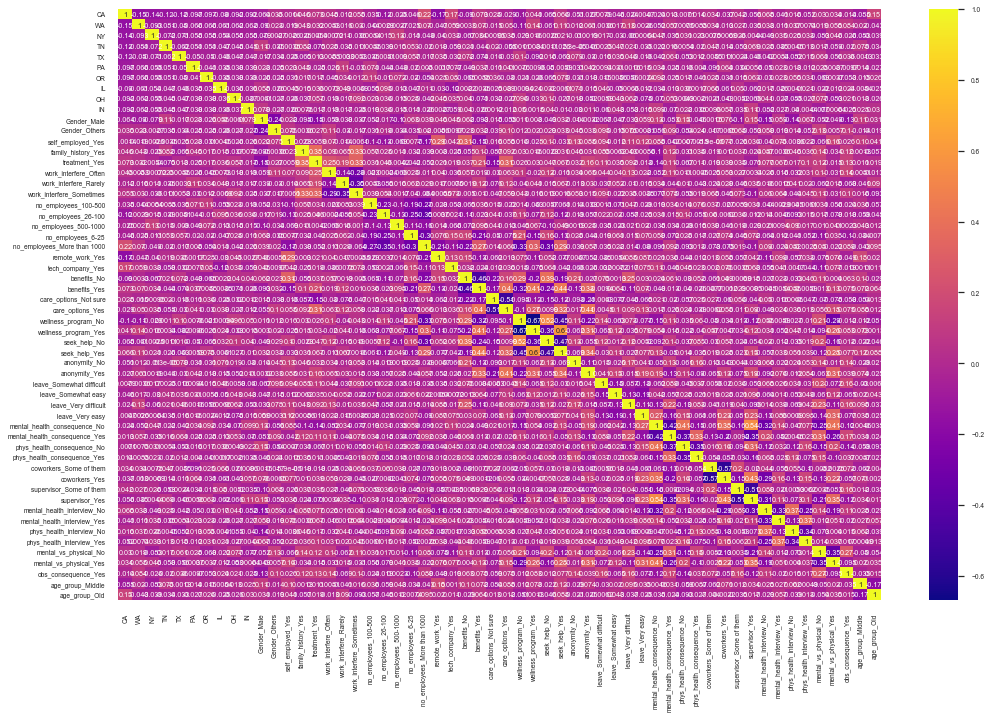

In [514]:
plt.figure(figsize=(15,10))
sns.set(font_scale=0.6)
sns.heatmap(df_dummies.corr(),annot=True,cmap='plasma')

plt.tight_layout()

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [477]:
RF= RandomForestClassifier()
RF.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [479]:
RF_preds=RF.predict(X_test)
print(classification_report(y_test,RF_preds))


              precision    recall  f1-score   support

           0       0.81      0.78      0.79       113
           1       0.81      0.84      0.82       129

    accuracy                           0.81       242
   macro avg       0.81      0.81      0.81       242
weighted avg       0.81      0.81      0.81       242



# HYPERPARAMETER TUNING

In [484]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 500, num = 10)]
max_features = ['auto', 'sqrt','log2']
max_depth = [int(x) for x in np.linspace(10, 100,10)]
min_samples_split = [2, 5, 10,14]
min_samples_leaf = [1, 2, 4,6,8]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}


In [485]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=10,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   11.1s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [486]:
rf_randomcv.best_params_

{'n_estimators': 400,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 40,
 'criterion': 'gini'}

In [487]:
best_random_grid=rf_randomcv.best_estimator_

In [489]:
from sklearn.metrics import accuracy_score
y_pred=best_random_grid.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.76      0.80       113
           1       0.81      0.88      0.84       129

    accuracy                           0.83       242
   macro avg       0.83      0.82      0.82       242
weighted avg       0.83      0.83      0.83       242

[[ 86  27]
 [ 15 114]]
